<a href="https://colab.research.google.com/github/ExplorerGumel/ArewaDS-Pytorch-Fellowship-Solutions/blob/main/Week_02%20-%20Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Solution




In [ ]:
# Import necessary libraries
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"The device on use is: {device}")

The device on use is: cuda


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [ ]:
# Create the data parameters
# assign true parameters values
weight = 0.3
bias = 0.9

# Make X and y using linear regression feature
start = 2
end = 5
steps = 0.01

X = torch.arange(start, end, steps).unsqueeze(dim=1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 300
Number of y samples: 300
First 10 X & y samples:
X: tensor([[2.0000],
        [2.0100],
        [2.0200],
        [2.0300],
        [2.0400],
        [2.0500],
        [2.0600],
        [2.0700],
        [2.0800],
        [2.0900]])
y: tensor([[1.5000],
        [1.5030],
        [1.5060],
        [1.5090],
        [1.5120],
        [1.5150],
        [1.5180],
        [1.5210],
        [1.5240],
        [1.5270]])


In [ ]:
# Split the data into training and testing
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test)

(240, 60)

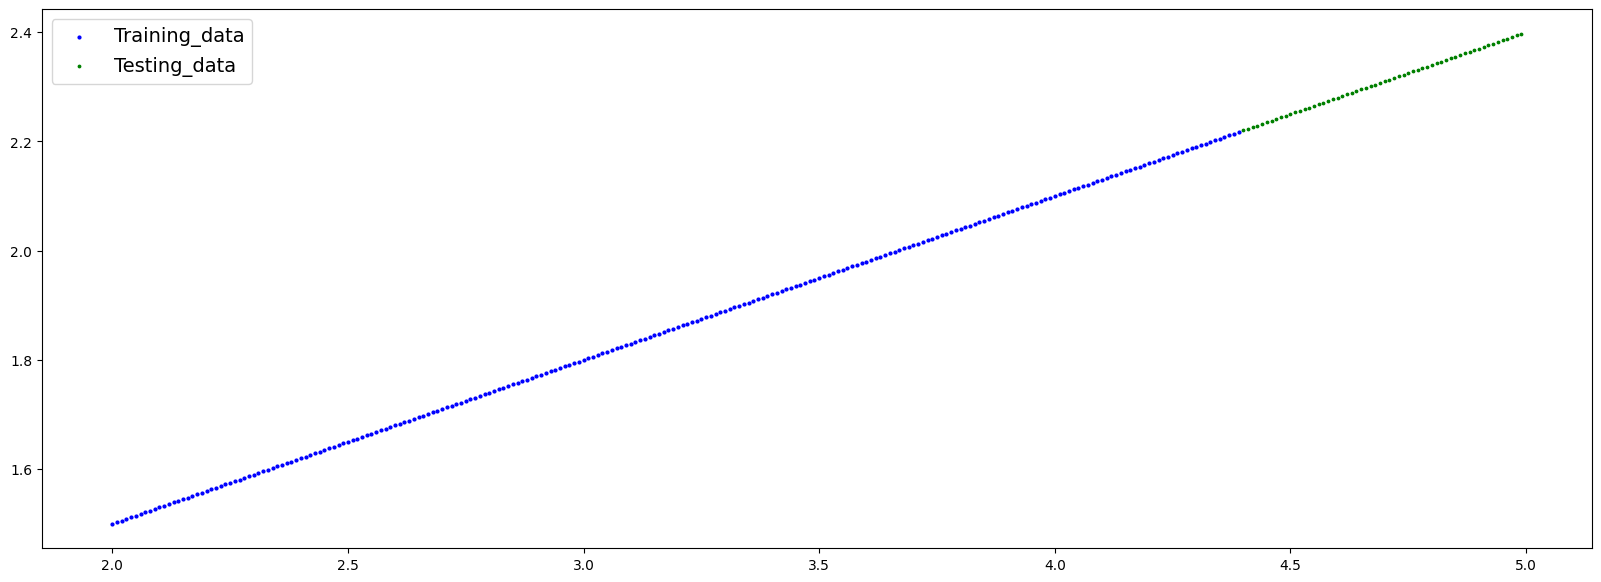

In [ ]:
# Plot the training and testing data
def plot_train_test(Xtrain, ytrain, Xtest, ytest):

  plt.figure(figsize=(20,7))

  plt.scatter(Xtrain, ytrain, c='b', s=4, label='Training_data')

  plt.scatter(Xtest, ytest, c='g', s=3, label='Testing_data')

  plt.legend(prop={"size": 14});

plot_train_test(X_train, y_train, X_test, y_test)

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [ ]:
# Create PyTorch linear regression model by subclassing nn.Module

# Create a Linear Regression model class
class LinearRegression(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.params = nn.Linear(in_features=1,
                                      out_features=1)


    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.params(x)

In [ ]:
# Instantiate the model and put it to the target device

# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
linear_model = LinearRegression()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [ ]:
# Create the loss function and optimizer

loss_fn = nn.L1Loss() # setting an L1 loss i.e fn to cal. difference btw true and predicted target

# Create the optimizer
optimizer = torch.optim.SGD(params=linear_model.parameters(),
                            lr=0.01)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 300

# Create empty loss lists to track values
train_losses = []
test_losses = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode
    linear_model.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = linear_model(X_train)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = linear_model(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_losses.append(loss.detach().numpy())
            test_losses.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 1.4142086505889893 | MAE Test Loss: 1.9510111808776855 
Epoch: 20 | MAE Train Loss: 0.033601291477680206 | MAE Test Loss: 0.06754238158464432 
Epoch: 40 | MAE Train Loss: 0.029422976076602936 | MAE Test Loss: 0.03553743660449982 
Epoch: 60 | MAE Train Loss: 0.06656603515148163 | MAE Test Loss: 0.011983601376414299 
Epoch: 80 | MAE Train Loss: 0.07390119880437851 | MAE Test Loss: 0.011330246925354004 
Epoch: 100 | MAE Train Loss: 0.07381364703178406 | MAE Test Loss: 0.009564753621816635 
Epoch: 120 | MAE Train Loss: 0.07305501401424408 | MAE Test Loss: 0.008969477377831936 
Epoch: 140 | MAE Train Loss: 0.07484226673841476 | MAE Test Loss: 0.008782649412751198 
Epoch: 160 | MAE Train Loss: 0.07484226673841476 | MAE Test Loss: 0.008782649412751198 
Epoch: 180 | MAE Train Loss: 0.07484226673841476 | MAE Test Loss: 0.008782649412751198 
Epoch: 200 | MAE Train Loss: 0.07484226673841476 | MAE Test Loss: 0.008782649412751198 
Epoch: 220 | MAE Train Loss: 0.0748422667

In [ ]:
print("The model learned the following values for weights and bias:")
print(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('params.weight', tensor([[0.7645]])), ('params.bias', tensor([0.8300]))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


In [ ]:
torch.manual_seed(42)

epochs = 300

# Create empty loss lists to track values
train_losses = []
test_losses = []
epoch_count = []

for epoch in range(epochs):
  ### Training

  # Put model in train mode

    # Put model in training mode (this is the default state of a model)
    model.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model.eval()


  with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
  ### Perform testing every 20 epochs
  if epoch % 20 == 0:
          epoch_count.append(epoch)
          train_losses.append(loss.detach().numpy())
          test_losses.append(test_loss.detach().numpy())
          print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [ ]:
# Make predictions with the model

# 1. first set the model in evaluation mode
linear_model.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():

  y_preds = linear_model(X_test)
y_preds[:10]

tensor([[2.3703],
        [2.3739],
        [2.3776],
        [2.3812],
        [2.3848],
        [2.3884],
        [2.3921],
        [2.3957],
        [2.3993],
        [2.4029]])

In [ ]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=y_preds)

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("ADSF_exercises")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=linear_model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)


In [ ]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)

# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegression()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

In [ ]:
# Make predictions with loaded model and compare them to the previous
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model